# 1.0 Use Case
In this noteboook, I will implement a contextual bandit algorithm for online shopping platform. The *contexts* are derived using a B2C business model but can easily be leveraged for other types of business 
model. In a bandit model for an online ecommerce platform, the contexts could be various characteristics of the user or the item. Here are a few examples:

1. User demographics: Age, gender, location, etc.
2. User behavior: Past purchases, browsing history, click patterns, etc.
3. Time: Time of day, day of the week, season, etc.
4. Item characteristics: Category, price, brand, ratings, etc.
5. Current context: What page the user is on, what they searched for, etc.

These contexts can be used to personalize the recommendations made by the bandit algorithm. For example, the algorithm might recommend different products to a user who is browsing in the morning compared to the evening, or to a user who has a history of purchasing electronics compared to a user who typically buys books.

There are several algorithms used in bandit models for online ecommerce platforms. Here are a few examples:

1. **Epsilon-Greedy Algorithm**: This is a simple method where the algorithm explores with a probability of epsilon and exploits the best option otherwise. 

2. **Upper Confidence Bound (UCB) Algorithm**: This algorithm balances exploration and exploitation by choosing the option with the highest upper confidence bound.

3. **Thompson Sampling**: This is a probabilistic algorithm that chooses an option based on the probability that it is the best option.

4. **Contextual Bandit Algorithms**: These algorithms take into account the context (user demographics, time of day, etc.) when choosing an option.

5. **Gradient Bandit Algorithms**: These algorithms use a gradient ascent method to update the preference for each action based on the received reward.

Each of these algorithms has its own strengths and weaknesses, and the choice of algorithm depends on the specific requirements of the ecommerce platform.

## 1.1 Algorithm Selection: 
I will be implementing a contextual bandit model using *Thompson Sampling* to power the model selection given a context. 

<Figure size 1500x500 with 0 Axes>

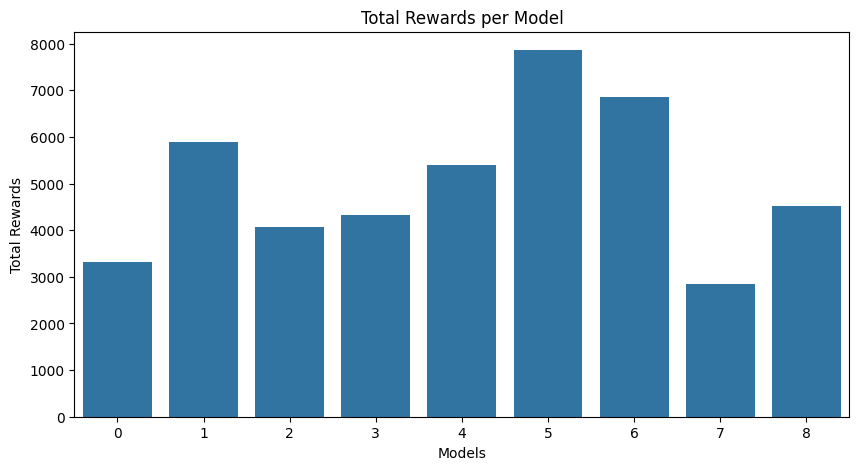

<Figure size 1500x500 with 0 Axes>

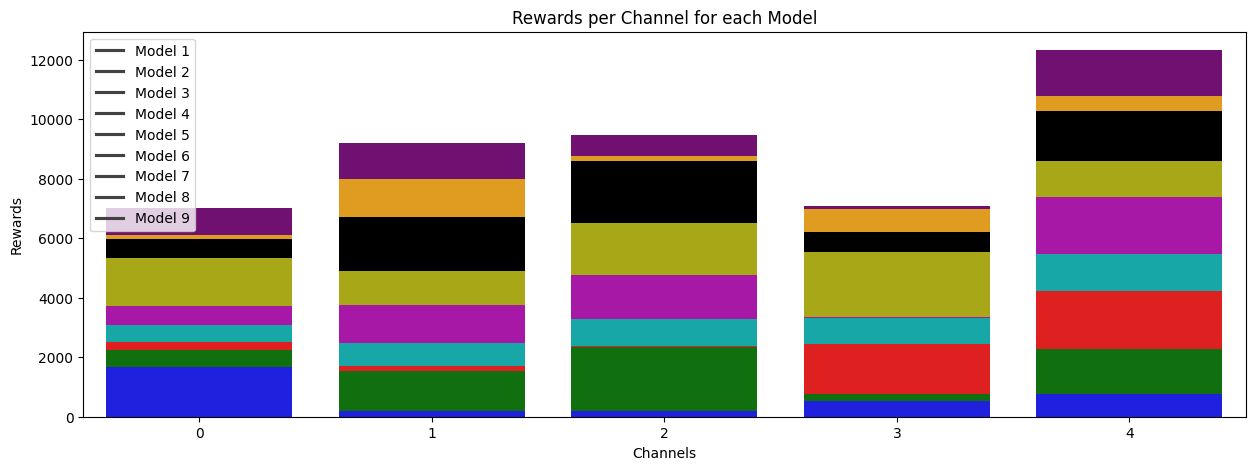

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class ContextualBandit:
    """
    A class to represent a contextual bandit model.

    Attributes:
    -----------
    num_states : int
        The number of states or channels.
    num_models : int
        The number of models or actions.
    rewards : np.ndarray
        A 2D numpy array of shape (num_states, num_models) representing the rewards for each action in each state.
    """

    def __init__(self, num_states, num_models):
        """
        Constructs all the necessary attributes for the ContextualBandit object.

        Parameters:
        -----------
        num_states : int
            The number of states or channels.
        num_models : int
            The number of models or actions.
        """
        self.num_states = num_states
        self.num_models = num_models
        self.rewards = np.array([[0.1, 0.2, 0.3, 0.4, 0.5],
                                 [0.6, 0.4, 0.3, 0.2, 0.1],
                                 [0.2, 0.3, 0.1, 0.1, 0.4],
                                 [0.4, 0.1, 0.2, 0.3, 0.4]])

    def get_reward(self, state, model):
        """
        Returns the reward for a given state and action.

        Parameters:
        -----------
        state : int
            The state or channel for which the reward is requested.
        model : int
            The model or action for which the reward is requested.

        Returns:
        --------
        float
            The reward for the given state and action.
        """
        return self.rewards[state, model]

class ThompsonSampling:
    """
    A class to represent the Thompson Sampling algorithm for a contextual bandit model.

    Attributes:
    -----------
    num_states : int
        The number of states or channels.
    num_models : int
        The number of models or actions.
    alpha : np.ndarray
        A 2D numpy array of shape (num_states, num_models) representing the alpha parameter for each action in each state.
    beta : np.ndarray
        A 2D numpy array of shape (num_states, num_models) representing the beta parameter for each action in each state.
    rewards_per_channel : np.ndarray
        A 2D numpy array of shape (num_states, num_models) representing the total rewards for each action in each state.
    model_rewards_per_channel_per_epoch : a 3D np.ndarray
        A 3D numpy array of shape (num_states, num_models, num_episodes) representing the rewards for each action in each state for each epoch.
    state_played_per_epoch : a 2D np.ndarray
        A 2D numpy array of shape (num_episodes, num_states) representing the state played for each epoch.
    """
    def __init__(self, num_states, num_models, num_episodes):
        """
        Constructs all the necessary attributes for the ThompsonSampling object.

        Parameters:
        -----------
        num_states : int
            The number of states or channels.
        num_models : int
            The number of models or actions.
        num_episodes : int
            The number of episodes or epochs for which the model is to be trained.
        """
        self.num_states = num_states
        self.num_models = num_models
        self.alpha = np.ones((num_states, num_models))
        self.beta = np.ones((num_states, num_models))
        self.total_rewards_per_channel = np.zeros((num_states, num_models))
        self.total_rewards_per_model = np.zeros(num_models)
        # Add model rewards per channel per epoch 
        self.model_rewards_per_channel_per_epoch = np.zeros((num_states, num_models, num_episodes))
        self.state_played_per_epoch = np.zeros(num_episodes, num_states)

    def select_action(self, state):
        """
        Selects an action for a given state using the Thompson Sampling algorithm.

        Parameters:
        -----------
        state : int
            The state or channel for which the action is to be selected.

        Returns:
        --------
        int
            The selected action.
        """
        theta = np.zeros(self.num_models)
        for i in range(self.num_models):
            theta[i] = np.random.beta(self.alpha[state, i], self.beta[state, i])
        return np.argmax(theta)

    def update(self, state, model, reward):
        """
        Updates the alpha and beta parameters for a given state, action and reward.

        Parameters:
        -----------
        state : int
            The state or channel for which the parameters are to be updated.
        model : int
            The model or action for which the parameters are to be updated.
        reward : float
            The reward for the given state and action.
        """
        self.alpha[state, model] += reward
        self.beta[state, model] += 1 - reward
        self.total_rewards_per_channel[state, model] += reward
        self.total_rewards_per_model[model] += reward
            The action or model for which the parameters are to be updated.
        reward : float
            The reward received for the given state and action.
        """
        if reward == 1:
            self.alpha[state, action] += 1
        else:
            self.beta[state, action] += 1
        self.total_rewards_per_channel[state, action] += reward
        self.total_rewards_per_model[action] += reward


# Training the model
num_states = 4
num_actions = 5
num_episodes = 100000

bandit = ContextualBandit(num_states, num_actions)
agent = ThompsonSampling(num_states, num_actions)

for i in range(num_episodes):
    state = np.random.randint(0, num_states)
    action = agent.select_action(state)
    reward = bandit.get_reward(state, action)
    agent.update(state, action, reward)

# Testing the model

# Plot rewards per channel for each model
plt.figure(figsize=(15, 5))
# Plot total rewards for each model across all channels
plt.figure(figsize=(10, 5))
sns.barplot(x=np.arange(num_actions), y=agent.total_rewards_per_model)
plt.xlabel('Models')
plt.ylabel('Total Rewards')
plt.title('Total Rewards per Model')
plt.show()

# Plot rewards per channel for all models in the
plt.figure(figsize=(15, 5))
plt.figure(figsize=(15, 5))
sns.barplot(x=np.arange(num_states), y=agent.total_rewards_per_channel[:,0], color='b')
sns.barplot(x=np.arange(num_states), y=agent.total_rewards_per_channel[:,1], color='g', bottom=agent.total_rewards_per_channel[:,0])
sns.barplot(x=np.arange(num_states), y=agent.total_rewards_per_channel[:,2], color='r', bottom=np.sum(agent.total_rewards_per_channel[:,:2], axis=1))
sns.barplot(x=np.arange(num_states), y=agent.total_rewards_per_channel[:,3], color='c', bottom=np.sum(agent.total_rewards_per_channel[:,:3], axis=1))
sns.barplot(x=np.arange(num_states), y=agent.total_rewards_per_channel[:,4], color='m', bottom=np.sum(agent.total_rewards_per_channel[:,:4], axis=1))
sns.barplot(x=np.arange(num_states), y=agent.total_rewards_per_channel[:,5], color='y', bottom=np.sum(agent.total_rewards_per_channel[:,:5], axis=1))
sns.barplot(x=np.arange(num_states), y=agent.total_rewards_per_channel[:,6], color='k', bottom=np.sum(agent.total_rewards_per_channel[:,:6], axis=1))
sns.barplot(x=np.arange(num_states), y=agent.total_rewards_per_channel[:,7], color='orange', bottom=np.sum(agent.total_rewards_per_channel[:,:7], axis=1))
sns.barplot(x=np.arange(num_states), y=agent.total_rewards_per_channel[:,8], color='purple', bottom=np.sum(agent.total_rewards_per_channel[:,:8], axis=1))
plt.xlabel('Channels')
plt.ylabel('Rewards')
plt.title('Rewards per Channel for each Model')
plt.legend(labels=['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8', 'Model 9'])
plt.show()